<a href="https://colab.research.google.com/github/Heity94/TWSM_Lab/blob/main/Homework/4_Classification/NL_NB_NN_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import MultinomialNB
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [295]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
#load pkl files
with open('/content/drive/MyDrive/Colab Notebooks/data_stemmed.pkl', 'rb') as f:
  data_stemmed = pickle.load(f)
data_stemmed = pd.DataFrame(data_stemmed,columns=['stemmed_text'])

In [297]:
with open('/content/drive/MyDrive/Colab Notebooks/data_lemma.pkl', 'rb') as f:
    data_lemma = pickle.load(f)
data_lemma = pd.DataFrame(data_lemma, columns=["lemma_text"])

In [298]:
# Import dataset and create y data
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df_stemmed = (pd.concat([data_stemmed, df], axis=1)).drop(columns=['content'])
df_lemma = pd.concat([data_lemma, df], axis=1).drop(columns=['content'])

In [299]:
df_lemma.head()

,lemma_text,target,target_names
0,car wonder enlighten car see day door sport ca...,7,rec.autos
1,clock poll final final clock report accelerati...,4,comp.sys.mac.hardware
2,question folk mac plus finally give ghost week...,4,comp.sys.mac.hardware
3,weitek nntp post host amber ssd csd harris com...,1,comp.graphics
4,shuttle launch question article cowcb world st...,14,sci.space


In [300]:
#split train test for stemmed data
y_stemmed = np.asarray(df_stemmed['target']).astype("float32")
x_stemmed = df_stemmed[['stemmed_text']]
X_stemmed_train, X_stemmed_test, y_stemmed_train, y_stemmed_test = train_test_split(x_stemmed, y_stemmed, test_size=0.1)

y_lemma = np.asarray(df_lemma['target']).astype("float32")
x_lemma = df_lemma[['lemma_text']]
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(x_lemma, y_lemma, test_size=0.1)

In [301]:

vec_abs= CountVectorizer(max_df=0.95, min_df=0.01) #Absolute frequency
vec_rel = TfidfVectorizer(max_df=0.95, min_df=0.01, use_idf=False, norm='l1') # Relative frequency
vec_tf = TfidfVectorizer(max_df=0.95, min_df=0.01, smooth_idf=False) #Tf-IDF frequency


**Naive Bayes** 

---



**Absolute frequency of Stemmed data**

In [308]:
#Stemmed data
X_stemmed_train_abs = vec_abs.fit_transform(X_stemmed_train["stemmed_text"]).toarray()
X_stemmed_test_abs = vec_abs.transform(X_stemmed_test["stemmed_text"]).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(X_stemmed_train_abs, y_stemmed_train)


MultinomialNB()

In [309]:
# Predict the Test set results, determine accuracy
y_pred_s = clf_nb_s.predict(X_stemmed_test_abs)
print('Train accuracy: ', clf_nb.score(X_stemmed_train_abs, y_stemmed_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_stemmed_test))

Train accuracy:  0.8463956000785701
Test accuracy:  0.7765017667844523


**Absolute frequency of lemmatized data**

In [313]:
#Stemmed data
X_lemma_train_abs = vec_abs.fit_transform(X_lemma_train["lemma_text"]).toarray()
X_lemma_test_abs = vec_abs.transform(X_lemma_test["lemma_text"]).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(X_lemma_train_abs, y_lemma_train)

MultinomialNB()

In [314]:
y_pred_l = clf_nb.predict(X_lemma_test_abs)
print('Train accuracy: ', clf_nb.score(X_lemma_train_abs, y_lemma_train))
print('Test accuracy: ', accuracy_score(y_pred_l, y_lemma_test))

Train accuracy:  0.8379493223335298
Test accuracy:  0.7826855123674912


**Relative frequency of stemmed data**

In [315]:
#Stemmed data
X_stemmed_train_rel = vec_rel.fit_transform(X_stemmed_train["stemmed_text"]).toarray()
X_stemmed_test_rel = vec_rel.transform(X_stemmed_test["stemmed_text"]).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(X_stemmed_train_rel, y_stemmed_train)


MultinomialNB()

In [316]:
# Predict the Test set results, determine accuracy
y_pred_s = clf_nb.predict(X_stemmed_test_rel)
print('Train accuracy: ', clf_nb.score(X_stemmed_train_rel, y_stemmed_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_stemmed_test))

Train accuracy:  0.7308976625417404
Test accuracy:  0.6899293286219081


**Relative frequency of lemmatized data**

In [317]:
#Lemma data
X_lemma_train_rel = vec_rel.fit_transform(X_lemma_train["lemma_text"]).toarray()
X_lemma_test_rel = vec_rel.transform(X_lemma_test["lemma_text"]).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(X_lemma_train_rel, y_lemma_train)


MultinomialNB()

In [318]:
# Predict the Test set results, determine accuracy
y_pred_l = clf_nb.predict(X_lemma_test_rel)
print('Train accuracy: ', clf_nb.score(X_lemma_train_rel, y_lemma_train))
print('Test accuracy: ', accuracy_score(y_pred_l, y_lemma_test))

Train accuracy:  0.7255941858181104
Test accuracy:  0.6749116607773852


**TFIDF of stemmed data**

In [319]:
#Stemmed data
X_stemmed_train_tf = vec_tf.fit_transform(X_stemmed_train["stemmed_text"]).toarray()
X_stemmed_test_tf = vec_tf.transform(X_stemmed_test["stemmed_text"]).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(X_stemmed_train_tf, y_stemmed_train)

MultinomialNB()

In [320]:
# Predict the Test set results, determine accuracy
y_pred_s = clf_nb.predict(X_stemmed_test_tf)
print('Train accuracy: ', clf_nb.score(X_stemmed_train_tf, y_stemmed_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_stemmed_test))

Train accuracy:  0.865252406207032
Test accuracy:  0.8118374558303887


**TFIDF of lemmatized data**

In [321]:
#Lemma data
X_lemma_train_tf = vec_tf.fit_transform(X_lemma_train["lemma_text"]).toarray()
X_lemma_test_tf = vec_tf.transform(X_lemma_test["lemma_text"]).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(X_lemma_train_tf, y_lemma_train)


MultinomialNB()

In [322]:
# Predict the Test set results, determine accuracy
y_pred_l = clf_nb.predict(X_lemma_test_tf)
print('Train accuracy: ', clf_nb.score(X_lemma_train_tf, y_lemma_train))
print('Test accuracy: ', accuracy_score(y_pred_l, y_lemma_test))

Train accuracy:  0.8531722647809861
Test accuracy:  0.7906360424028268


**Neural Network** 

---



In [324]:
np.unique(df_stemmed[["target"]])
#20 different target

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [339]:
np.unique(df_lemma[["target"]])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

**Abs of stemmed data**

In [328]:
#transfer to categorical datatype
y_train_stemmed_cat = to_categorical(y_stemmed_train)
y_test_stemmed_cat = to_categorical(y_stemmed_test)

y_train_lemma_cat = to_categorical(y_lemma_train)
y_test_lemma_cat = to_categorical(y_lemma_test)

In [335]:
callback = EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in the loss for 20 consecutive epochs.
model = keras.Sequential([
    layers.Dense(60, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="sigmoid")
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.asarray(X_stemmed_train_abs).astype("float32"), y_train_stemmed_cat, epochs=10, batch_size=1, callbacks=[callback], verbose=0)


In [336]:
results = model.evaluate(np.asarray(X_stemmed_test_abs).astype("float32"), y_test_stemmed_cat, verbose=0)
print(results[1]) #accuracy

0.7800353169441223


In [337]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

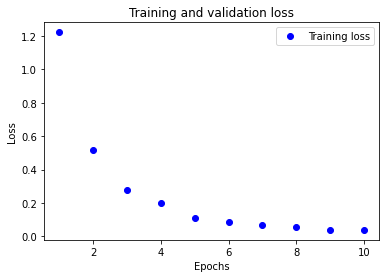

In [338]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Abs of lemma data**

In [340]:
callback = EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in the loss for 20 consecutive epochs.
model = keras.Sequential([
    layers.Dense(60, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="sigmoid")
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.asarray(X_lemma_train_abs).astype("float32"), y_train_lemma_cat, epochs=10, batch_size=1, callbacks=[callback], verbose=0)


In [341]:
results = model.evaluate(np.asarray(X_lemma_test_abs).astype("float32"), y_test_lemma_cat, verbose=0)
print(results[1]) #accuracy

0.7738515734672546


In [342]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

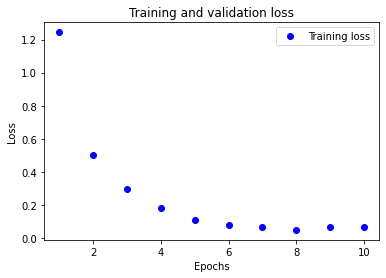

In [344]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Rel of stemmed data**

In [345]:
callback = EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in the loss for 20 consecutive epochs.
model = keras.Sequential([
    layers.Dense(60, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="sigmoid")
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.asarray(X_stemmed_train_rel).astype("float32"), y_train_stemmed_cat, epochs=10, batch_size=1, callbacks=[callback], verbose=0)


In [346]:
results = model.evaluate(np.asarray(X_stemmed_test_rel).astype("float32"), y_test_stemmed_cat, verbose=0)
print(results[1]) #accuracy

0.7888692617416382


In [347]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

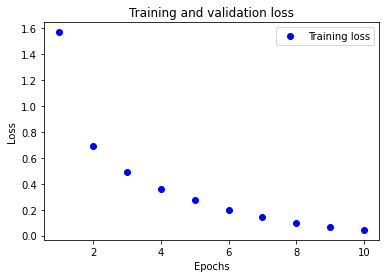

In [348]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Rel of lemma data**

In [349]:
callback = EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in the loss for 20 consecutive epochs.
model = keras.Sequential([
    layers.Dense(60, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="sigmoid")
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.asarray(X_lemma_train_rel).astype("float32"), y_train_lemma_cat, epochs=10, batch_size=1, callbacks=[callback], verbose=0)


In [350]:
results = model.evaluate(np.asarray(X_lemma_test_rel).astype("float32"), y_test_lemma_cat, verbose=0)
print(results[1]) #accuracy

0.7694346308708191


In [351]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

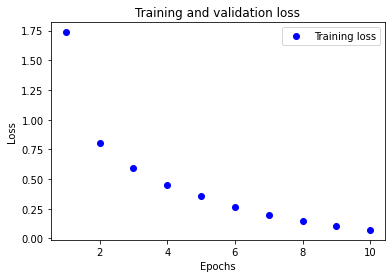

In [352]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**TF of stemmed data**

In [353]:
callback = EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in the loss for 20 consecutive epochs.
model = keras.Sequential([
    layers.Dense(60, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="sigmoid")
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.asarray(X_stemmed_train_tf).astype("float32"), y_train_stemmed_cat, epochs=10, batch_size=1, callbacks=[callback], verbose=0)


In [354]:
results = model.evaluate(np.asarray(X_stemmed_test_tf).astype("float32"), y_test_stemmed_cat, verbose=0)
print(results[1]) #accuracy

0.7932862043380737


In [355]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

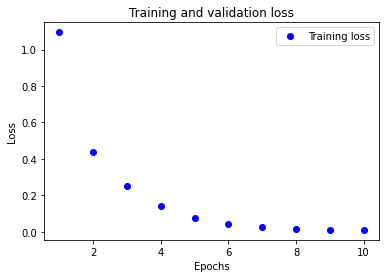

In [356]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**TF of lemma data**

In [357]:
callback = EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in the loss for 20 consecutive epochs.
model = keras.Sequential([
    layers.Dense(60, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="sigmoid")
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.asarray(X_lemma_train_tf).astype("float32"), y_train_lemma_cat, epochs=10, batch_size=1, callbacks=[callback], verbose=0)


In [358]:
results = model.evaluate(np.asarray(X_lemma_test_tf).astype("float32"), y_test_lemma_cat, verbose=0)
print(results[1]) #accuracy

0.7844523191452026


In [359]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

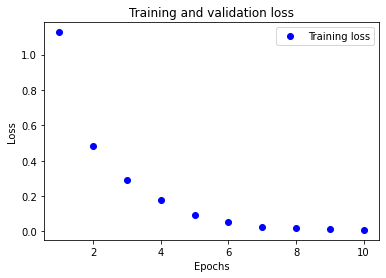

In [360]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()